<a href="https://colab.research.google.com/github/akhil262019/Iphone13_review/blob/main/Iphone_13_pro_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries 

In [48]:
import requests 
from bs4 import BeautifulSoup as bs
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus  import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#creating Empty List
ip_reviews=[]
for i in range(20):
  ip=[]
  url="https://www.amazon.in/Apple-iPhone-13-Pro-128GB/product-reviews/B09G99YPQM/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response=requests.get(url)
  soup=bs(response.content,"html.parser")
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
 
  for i in range(len(reviews)):
     ip.append(reviews[i].text)
  
  ip_reviews=ip_reviews+ip


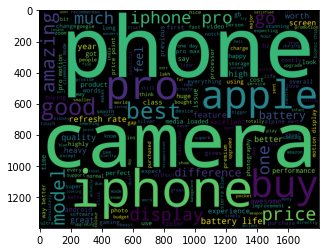

In [50]:
#writing reviews into text file
with open("iphone.txt","w",encoding='utf8') as output:
  for i in ip_reviews:
    output.write(i+"\n\n")

#Joining all the reviews into single paragraph
ip_review_para=" ".join(ip_reviews)

# Removing unwanted symbols from paragraph
ip_review_para=re.sub("[^A-Za-z" "]+"," ",ip_review_para).lower()
ip_review_para=re.sub("[0-9" "]+"," ",ip_review_para)

#words that contained in iphone13 pro
ip_words=ip_review_para.split()
ip_words

stop_words=stopwords.words('english')
ip_words=[ i for i in ip_words if i  not in stop_words]

ip_review_para=" ".join(ip_words)
wordcloud_ip=WordCloud( 
            background_color='black',
            width=1800,
            height=1400,
).generate(ip_review_para)

plt.imshow(wordcloud_ip)